In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from service.preprocessing import preprocessing

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df['채무 불이행 여부'].value_counts(normalize=True)

채무 불이행 여부
0    0.6588
1    0.3412
Name: proportion, dtype: float64

In [4]:
df.shape

(10000, 18)

In [5]:
_, _, df = preprocessing(df,df)

In [6]:
# PCA로 2차원으로 축소
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)

In [7]:
# K-Means로 군집화 수행
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_reduced)

c:\dev\ML\prediction-of-default\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\dev\ML\prediction-of-default\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Playdata\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Playdata\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executab

KMeans(n_clusters=3, random_state=42)

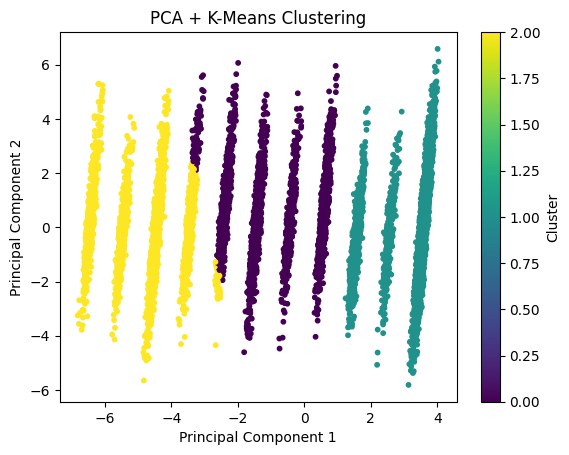

In [8]:
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.title("PCA + K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()